# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [17]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [18]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [19]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [20]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016159,0.034117,0.090528,0.130256,0.989637,0.977230
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004747,0.040829,0.053446,0.137495,0.996955,0.972751
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014488,0.015499,0.096152,0.099568,0.990708,0.989656
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014351,0.015406,0.095366,0.099239,0.990796,0.989718
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012900,0.016470,0.090554,0.102575,0.991727,0.989008


## Feature Effect Results

In [21]:
feauture_effect_type = "pdp_results"

In [22]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.095438,0.247000,2.502027e-02,2.319724e-03
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.118618,0.391003,7.255904e-03,6.453831e-03
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000499,0.002117,4.758951e-04,3.697650e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.001046,0.001039,1.053718e-08,1.053718e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000773,0.001792,8.376054e-04,2.043088e-03


## Correlation Analysis

In [23]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

Index(['index_x', 'model_id', 'model_x', 'simulation_x', 'n_train_x', 'snr_x',
       'mse_train', 'mse_test', 'mae_train', 'mae_test', 'r2_train', 'r2_test',
       'index_y', 'model_y', 'simulation_y', 'n_train_y', 'snr_y', 'metric',
       'x_1', 'x_2', 'x_3', 'x_4'],
      dtype='object')


,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016159,0.034117,0.090528,0.130256,0.989637,0.977230,x_1,0.095438
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004747,0.040829,0.053446,0.137495,0.996955,0.972751,x_1,0.118618
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014488,0.015499,0.096152,0.099568,0.990708,0.989656,x_1,0.000499
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014351,0.015406,0.095366,0.099239,0.990796,0.989718,x_1,0.001046
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012900,0.016470,0.090554,0.102575,0.991727,0.989008,x_1,0.000773


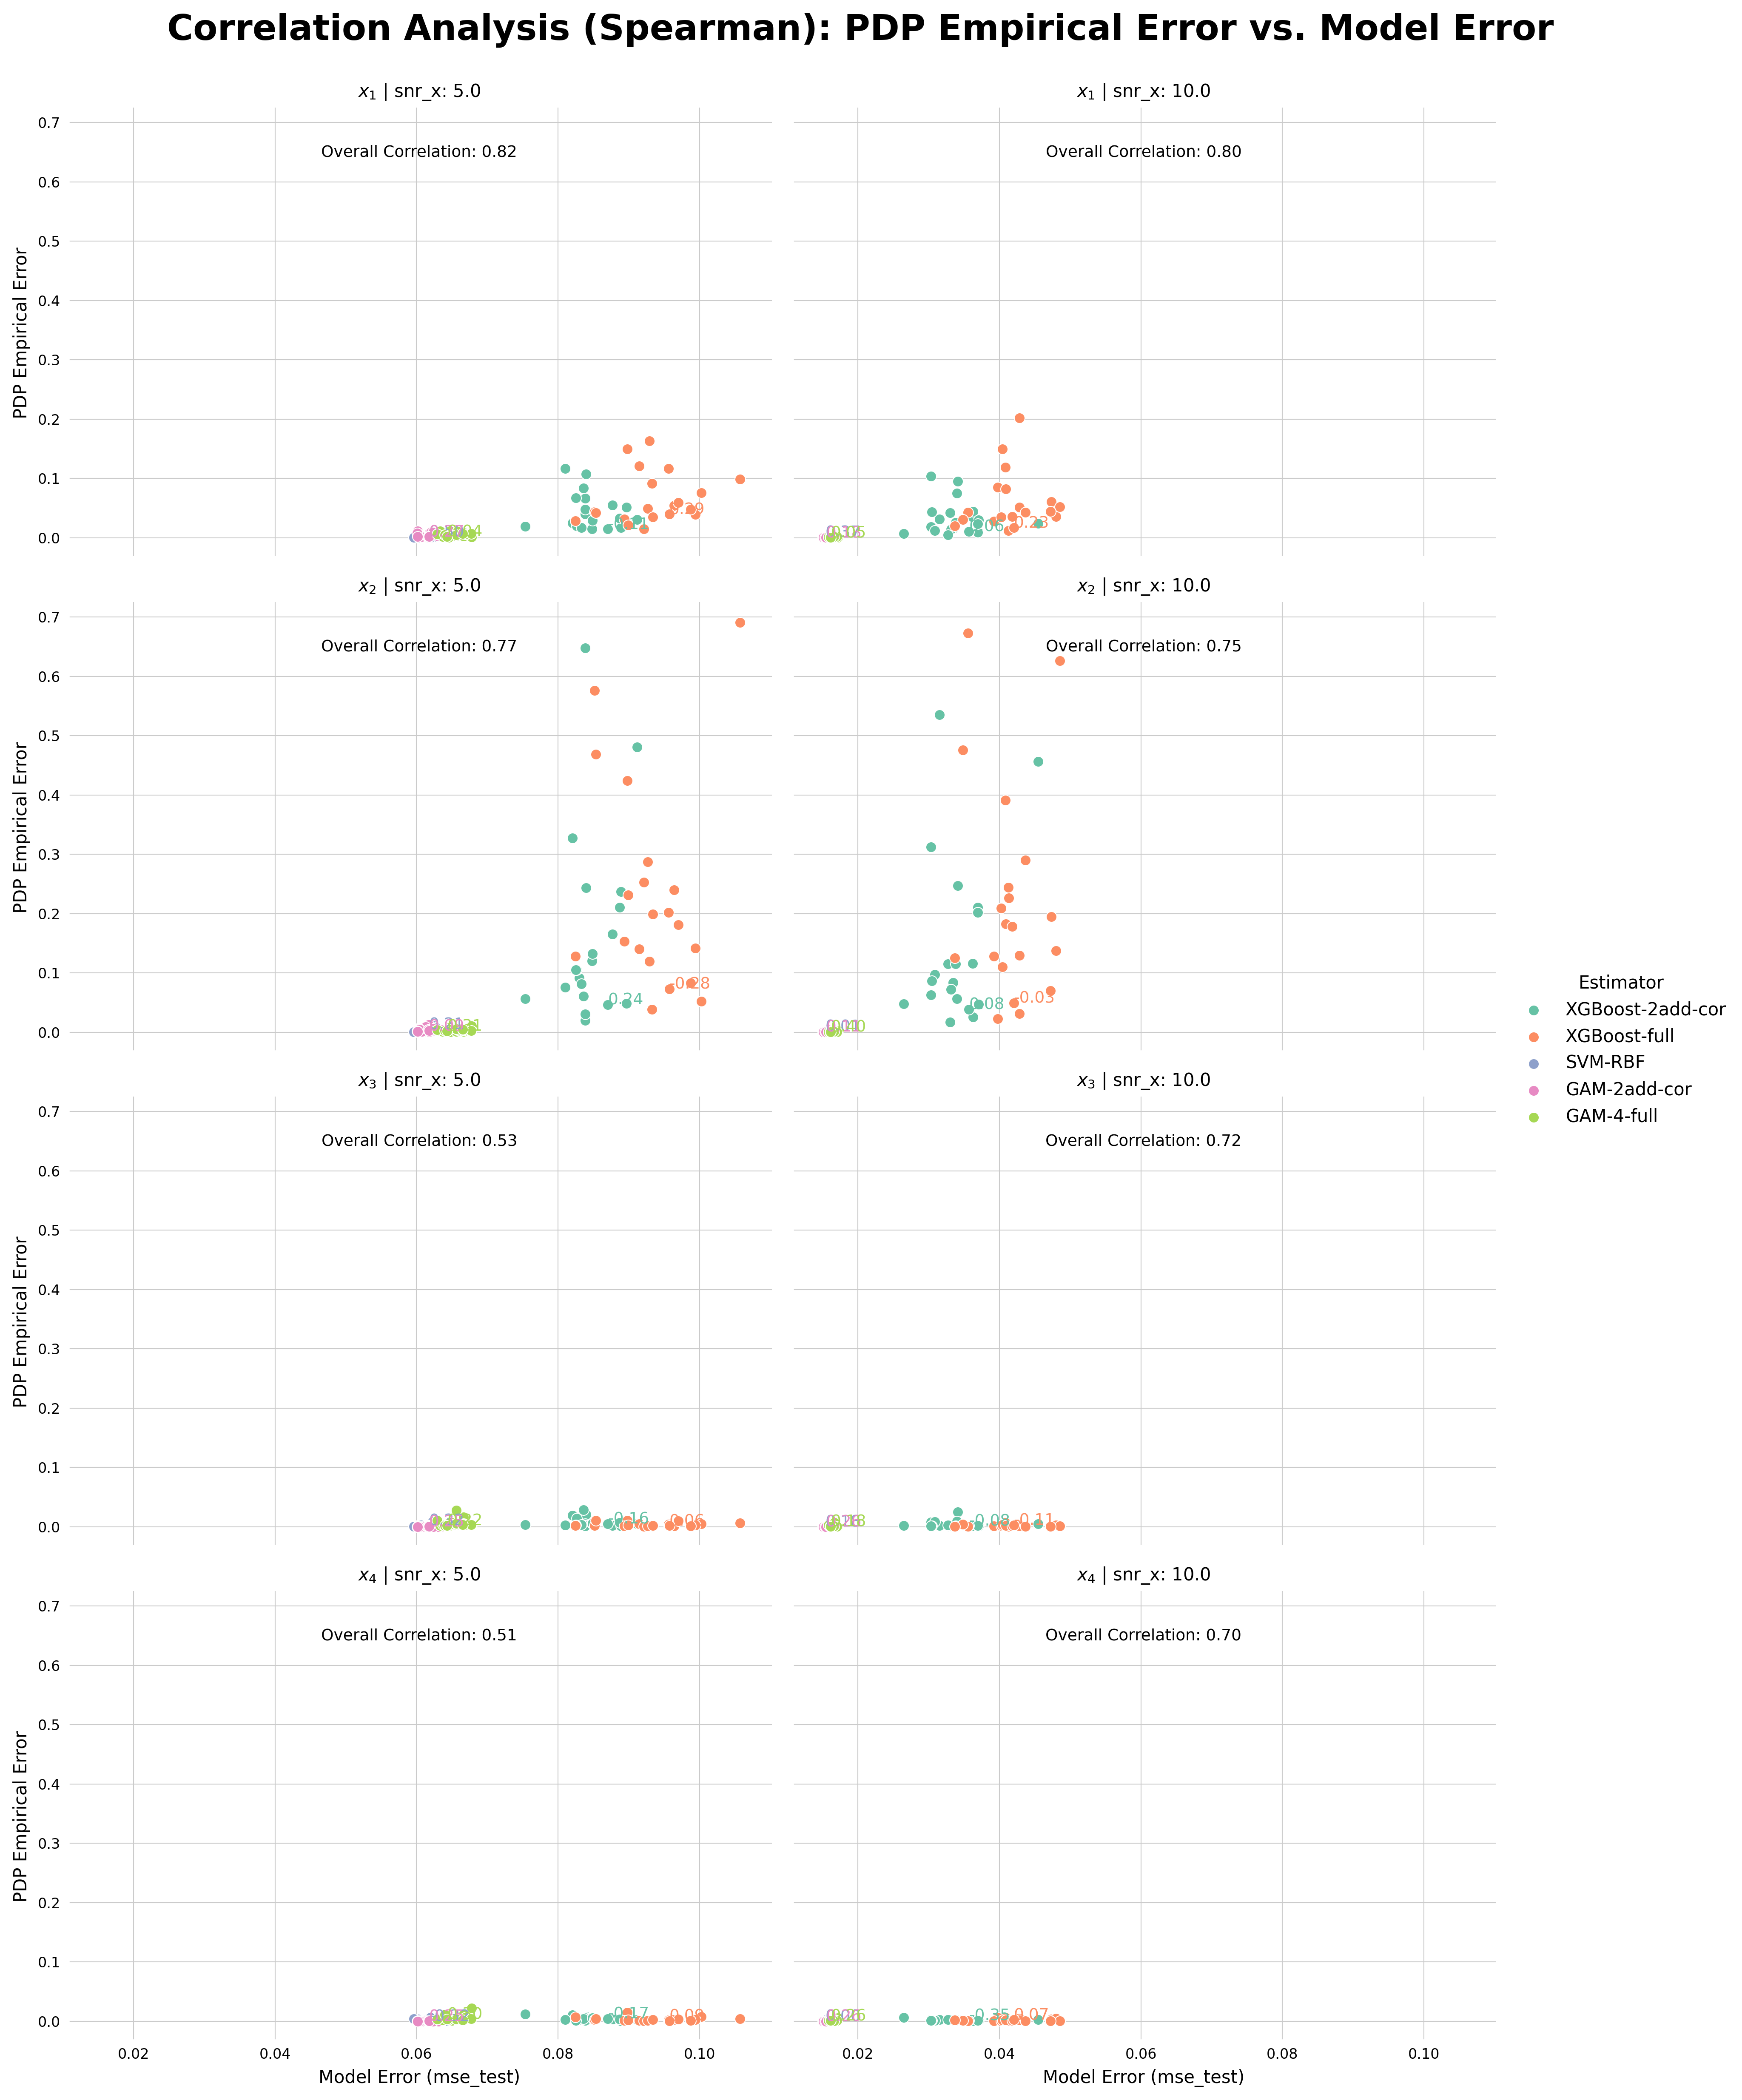

In [24]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [25]:
g;

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.820078
             XGBoost-2add-cor    -0.109774
             XGBoost-full         0.288722
             SVM-RBF              0.497744
             GAM-2add-cor         0.269173
             GAM-4-full           0.042105
        10.0 Overall              0.796376
             XGBoost-2add-cor     0.063158
             XGBoost-full         0.228571
             SVM-RBF              0.366917
             GAM-2add-cor         0.181955
             GAM-4-full           0.046617
x_2     5.0  Overall              0.768449
             XGBoost-2add-cor     0.239098
             XGBoost-full        -0.276692
             SVM-RBF              0.209023
             GAM-2add-cor         0.090226
             GAM-4-full           0.305263
        10.0 Overall              0.749511
             XGBoost-2add-cor     0.082707
             XGBoost-full        -0.030075
             SVM-RBF              0.009023
             GAM-2add-cor         0.114286
             GAM-4-full           0.398496
x_3     5.0  Overall              0.526613
             XGBoost-2add-cor    -0.163910
             XGBoost-full         0.057143
             SVM-RBF              0.323308
             GAM-2add-cor         0.248120
             GAM-4-full           0.222556
        10.0 Overall              0.720600
             XGBoost-2add-cor    -0.081203
             XGBoost-full        -0.111278
             SVM-RBF              0.175940
             GAM-2add-cor         0.260150
             GAM-4-full           0.177444
x_4     5.0  Overall              0.513075
             XGBoost-2add-cor    -0.172932
             XGBoost-full         0.093233
             SVM-RBF             -0.320301
             GAM-2add-cor         0.248120
             GAM-4-full           0.303759
        10.0 Overall              0.702562
             XGBoost-2add-cor    -0.347368
             XGBoost-full         0.070677
             SVM-RBF              0.004511
             GAM-2add-cor         0.260150
             GAM-4-full           0.255639

## Feature Effect Results

In [26]:
feauture_effect_type = "ale_results"

In [27]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.017291,0.055682,0.004393,0.001709
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.020082,0.071291,0.002280,0.001288
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000127,0.000411,0.000102,0.000033
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000131,0.000167,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000095,0.000344,0.000250,0.000481


## Correlation Analysis

In [28]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

Index(['index_x', 'model_id', 'model_x', 'simulation_x', 'n_train_x', 'snr_x',
       'mse_train', 'mse_test', 'mae_train', 'mae_test', 'r2_train', 'r2_test',
       'index_y', 'model_y', 'simulation_y', 'n_train_y', 'snr_y', 'metric',
       'x_1', 'x_2', 'x_3', 'x_4'],
      dtype='object')


,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016159,0.034117,0.090528,0.130256,0.989637,0.977230,x_1,0.017291
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.004747,0.040829,0.053446,0.137495,0.996955,0.972751,x_1,0.020082
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014488,0.015499,0.096152,0.099568,0.990708,0.989656,x_1,0.000127
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014351,0.015406,0.095366,0.099239,0.990796,0.989718,x_1,0.000131
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012900,0.016470,0.090554,0.102575,0.991727,0.989008,x_1,0.000095


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


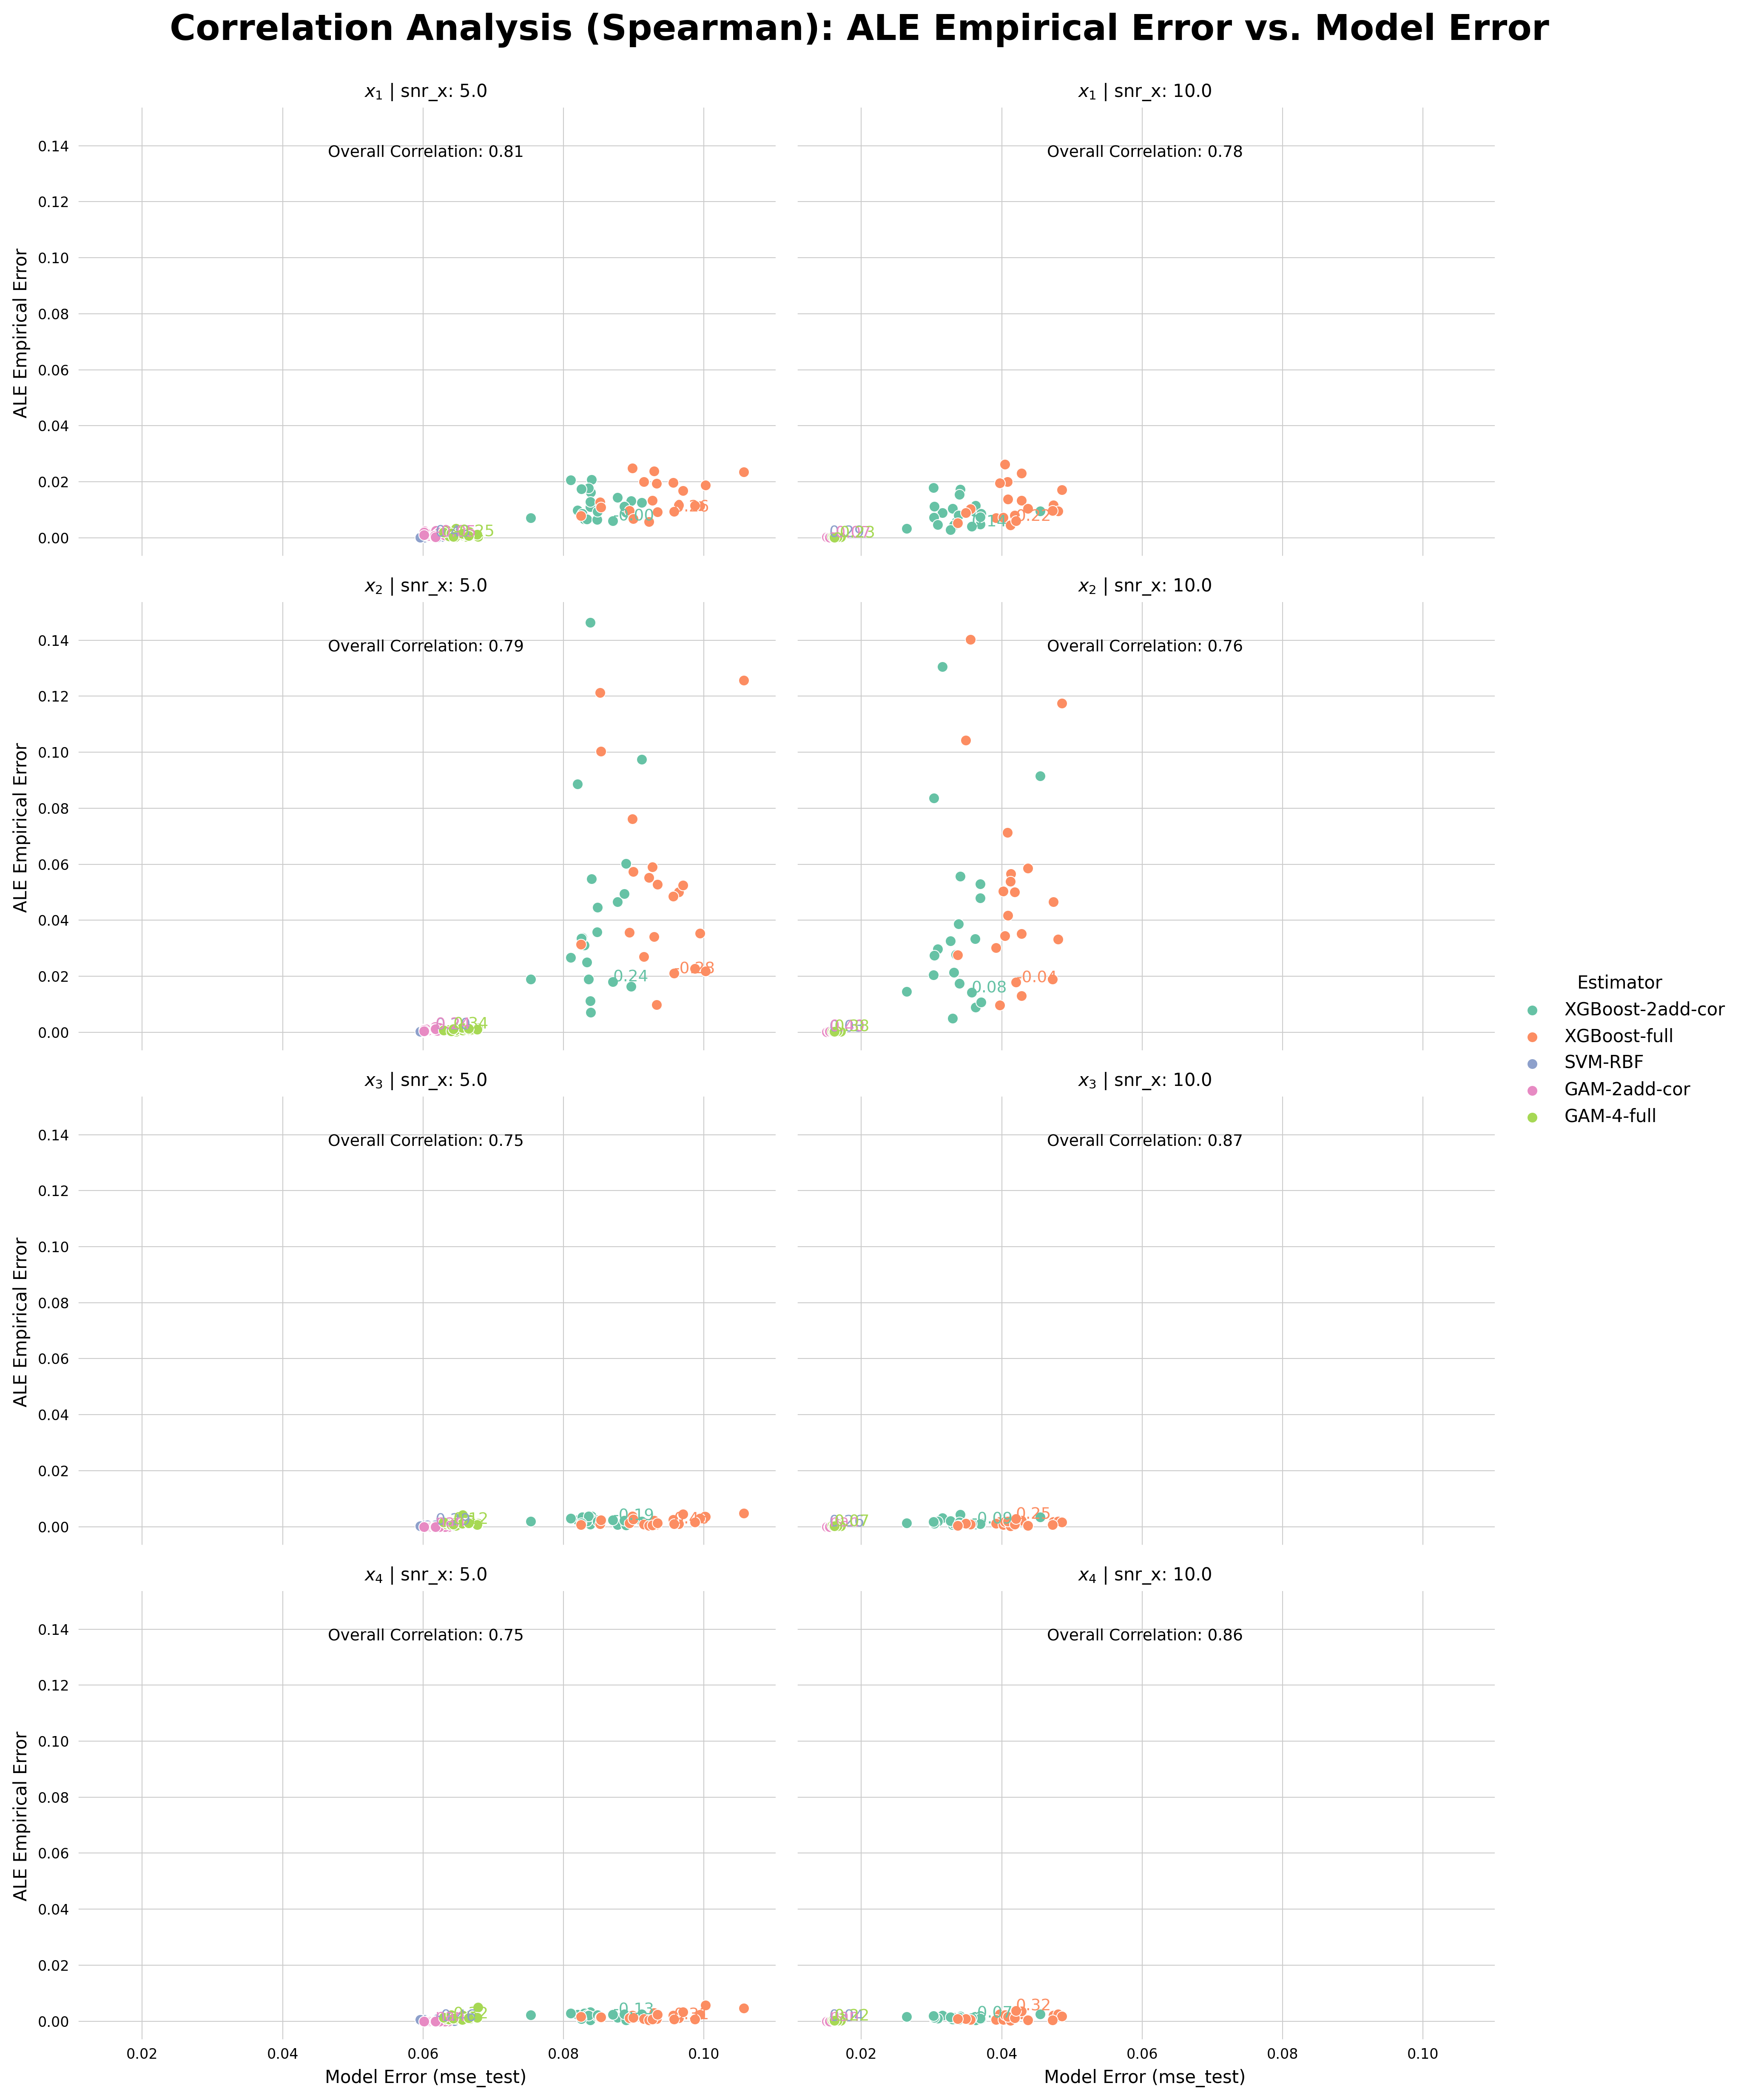

In [32]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [33]:
g;

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.811029
             XGBoost-2add-cor    -0.004511
             XGBoost-full         0.261654
             SVM-RBF              0.434586
             GAM-2add-cor        -0.052632
             GAM-4-full          -0.245113
        10.0 Overall              0.781674
             XGBoost-2add-cor     0.135338
             XGBoost-full         0.215038
             SVM-RBF              0.285714
             GAM-2add-cor        -0.069173
             GAM-4-full          -0.230075
x_2     5.0  Overall              0.794059
             XGBoost-2add-cor     0.236090
             XGBoost-full        -0.276692
             SVM-RBF              0.204511
             GAM-2add-cor         0.239098
             GAM-4-full           0.344361
        10.0 Overall              0.763900
             XGBoost-2add-cor     0.078195
             XGBoost-full        -0.043609
             SVM-RBF              0.034586
             GAM-2add-cor         0.401504
             GAM-4-full           0.378947
x_3     5.0  Overall              0.750134
             XGBoost-2add-cor    -0.189474
             XGBoost-full         0.457143
             SVM-RBF              0.287218
             GAM-2add-cor              NaN
             GAM-4-full           0.124812
        10.0 Overall              0.867266
             XGBoost-2add-cor    -0.091729
             XGBoost-full         0.254135
             SVM-RBF              0.255639
             GAM-2add-cor              NaN
             GAM-4-full           0.069173
x_4     5.0  Overall              0.747893
             XGBoost-2add-cor    -0.132331
             XGBoost-full         0.311278
             SVM-RBF             -0.464662
             GAM-2add-cor              NaN
             GAM-4-full           0.315789
        10.0 Overall              0.864591
             XGBoost-2add-cor    -0.073684
             XGBoost-full         0.320301
             SVM-RBF              0.043609
             GAM-2add-cor              NaN
             GAM-4-full           0.221053